In [1]:
import pandas as pd
import os
import glob
import sys
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

path = r'/Users/Cesar/Desktop/Hunter_College/SPRING2019/stat715/Project/Data/Citi_Bike_Daily_Ridership_Membership_Data'                     
all_files = glob.glob(os.path.join(path, "*.csv"))     # a concatenation OS independent csv files in directory 
df   = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True, sort= True)
df.columns
#df.shape

Index(['24-Hour Passes Purchased (midnight to 11:59 pm)',
       '24-Hour Passes Purchased (midnight to 11:59 pm)\t7-Day Passes Purchased (midnight to 11:59 pm)',
       '3-Day Passes Purchased (midnight to 11:59 pm)',
       '7-Day Passes Purchased (midnight to 11:59 pm)',
       'Annual Member Sign-Ups (midnight to 11:59 pm)',
       'Cumulative trips (since launch)', 'Cumulative trips (since launch):',
       'Date', 'Miles traveled to date', 'Miles traveled to date:',
       'Miles traveled today (midnight to 11:59 pm)', 'Total Annual Members',
       'Total Annual Members (All Time)', 'Total Annual Memberships Sold',
       'Trips over the past 24-hours (midnight to 11:59pm)'],
      dtype='object')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 15 columns):
24-Hour Passes Purchased (midnight to 11:59 pm)                                                  2004 non-null object
24-Hour Passes Purchased (midnight to 11:59 pm)	7-Day Passes Purchased (midnight to 11:59 pm)    92 non-null float64
3-Day Passes Purchased (midnight to 11:59 pm)                                                    1056 non-null float64
7-Day Passes Purchased (midnight to 11:59 pm)                                                    1039 non-null object
Annual Member Sign-Ups (midnight to 11:59 pm)                                                    584 non-null object
Cumulative trips (since launch)                                                                  91 non-null float64
Cumulative trips (since launch):                                                                 1224 non-null object
Date                                                                 

In [3]:
df.isnull().sum()

24-Hour Passes Purchased (midnight to 11:59 pm)                                                     92
24-Hour Passes Purchased (midnight to 11:59 pm)\t7-Day Passes Purchased (midnight to 11:59 pm)    2004
3-Day Passes Purchased (midnight to 11:59 pm)                                                     1040
7-Day Passes Purchased (midnight to 11:59 pm)                                                     1057
Annual Member Sign-Ups (midnight to 11:59 pm)                                                     1512
Cumulative trips (since launch)                                                                   2005
Cumulative trips (since launch):                                                                   872
Date                                                                                                 0
Miles traveled to date                                                                            2005
Miles traveled to date:                                                  

In [4]:
df = df[['Date', 'Trips over the past 24-hours (midnight to 11:59pm)','Miles traveled today (midnight to 11:59 pm)', 'Total Annual Members (All Time)', 'Total Annual Members','Total Annual Memberships Sold']]
df['Date'] = pd.to_datetime(df.Date)
df.sort_values(by=['Date'], inplace=True, ascending=True)
df.head(10)

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),Total Annual Members,Total Annual Memberships Sold
1146,2013-05-27,9767,21.533,NaN,17216.0,NaN
1147,2013-05-28,5215,8.780,NaN,19816.0,NaN
1148,2013-05-29,10981,21.898,NaN,21986.0,NaN
1149,2013-05-30,9850,20.321,NaN,23985.0,NaN
1150,2013-05-31,9253,20.243,NaN,25615.0,NaN
1151,2013-06-01,9852,26.347,NaN,26756.0,NaN
1152,2013-06-02,17590,52.143,NaN,28253.0,NaN
1153,2013-06-03,8599,18.907,NaN,29616.0,NaN
1154,2013-06-04,17589,48.666,NaN,31095.0,NaN
1155,2013-06-05,17433,44.917,NaN,32620.0,NaN


In [5]:
total2=[]
Total_Annual_Members=[]
df['total2']= df['Total Annual Members (All Time)'].combine_first(df['Total Annual Members'])
df['Total Annual Members (All Time)'].fillna(df['Total Annual Members'])
df['Total_Annual_Members']= df['Total Annual Memberships Sold'].combine_first(df['total2'])
df['Total Annual Memberships Sold'].fillna(df['total2'])
df = df[['Date', 'Trips over the past 24-hours (midnight to 11:59pm)','Miles traveled today (midnight to 11:59 pm)']]
df.head(5)

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm)
1146,2013-05-27,9767,21.533
1147,2013-05-28,5215,8.780
1148,2013-05-29,10981,21.898
1149,2013-05-30,9850,20.321
1150,2013-05-31,9253,20.243


In [6]:
df.columns = ['Date', 'Trips per day', "Miles Per Day"]

In [7]:
df.head(5)

,Date,Trips per day,Miles Per Day
1146,2013-05-27,9767,21.533
1147,2013-05-28,5215,8.780
1148,2013-05-29,10981,21.898
1149,2013-05-30,9850,20.321
1150,2013-05-31,9253,20.243


In [8]:
df.isnull().sum()

Date             0
Trips per day    0
Miles Per Day    0
dtype: int64

In [9]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head(5)

,Date,Trips_per_day,Miles_Per_Day
1146,2013-05-27,9767,21.533
1147,2013-05-28,5215,8.780
1148,2013-05-29,10981,21.898
1149,2013-05-30,9850,20.321
1150,2013-05-31,9253,20.243


In [10]:
df.dtypes

Date             datetime64[ns]
Trips_per_day             int64
Miles_Per_Day           float64
dtype: object

In [11]:
test_df = df[(df.Date > '2019-01-01') & (df.Date <= '2019-02-20')]
test_df.tail(5)

,Date,Trips_per_day,Miles_Per_Day
411,2019-02-16,31347,52760.0
412,2019-02-17,24287,39660.0
413,2019-02-18,26176,37500.0
414,2019-02-19,35226,49024.0
415,2019-02-20,20690,28763.0


In [12]:
train_df = df[(df.Date > '2013-05-27') & (df.Date <= '2018-12-31')]
train_df.tail(5)

,Date,Trips_per_day,Miles_Per_Day
87,2018-12-27,31169,48943.0
88,2018-12-28,12039,17576.0
89,2018-12-29,29037,54116.0
90,2018-12-30,22536,37741.0
91,2018-12-31,18936,29794.0


In [ ]:
test_df_CSV = test_df.to_csv (r'/Users/Cesar/Desktop/Hunter_College/SPRING2019/stat715/Project/R/test_df.csv', index = None, header=True)
train_df_CSV = train_df.to_csv (r'/Users/Cesar/Desktop/Hunter_College/SPRING2019/stat715/Project/R/train_df.csv', index = None, header=True)


In [ ]:
#data_frame[(data_frame.index > '2017-08-10') & (data_frame.index <= '2017-08-15')]

In [ ]:
#df =df.to_csv (r'/Users/Cesar/Desktop/Hunter_College/SPRING2019/stat715/Project/R/df.csv', index = None, header=True)

In [13]:
df_date_idx = df.set_index('Date')
df_date_idx.index

DatetimeIndex(['2013-05-27', '2013-05-28', '2013-05-29', '2013-05-30',
               '2013-05-31', '2013-06-01', '2013-06-02', '2013-06-03',
               '2013-06-04', '2013-06-05',
               ...
               '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14',
               '2019-02-15', '2019-02-16', '2019-02-17', '2019-02-18',
               '2019-02-19', '2019-02-20'],
              dtype='datetime64[ns]', name='Date', length=2096, freq=None)

In [14]:
#df_date_idx =df_date_idx.to_csv (r'/Users/Cesar/Desktop/Hunter_College/SPRING2019/stat715/Project/R/df_date_idx.csv', index = None, header=True)

In [15]:
miles_idx= df_date_idx['Miles_Per_Day']
miles_idx.index
miles_idx_2 = miles_idx[(miles_idx.index > '2014-08-14') & (miles_idx.index <= '2019-02-20')]


In [16]:
miles_idx_mean= miles_idx_2.resample('MS').mean()
miles_idx_mean['2018':].head(5)
miles_idx_mean

Date
2014-08-01     61337.411765
2014-09-01     59961.866667
2014-10-01     48261.774194
2014-11-01     28616.633333
2014-12-01     19850.935484
2015-01-01     13194.129032
2015-02-01     10052.321429
2015-03-01     16425.451613
2015-04-01     39560.566667
2015-05-01     60525.935484
2015-06-01     56116.433333
2015-07-01     65044.774194
2015-08-01     72789.387097
2015-09-01     81103.500000
2015-10-01     77128.935484
2015-11-01     63552.266667
2015-12-01     48403.774194
2016-01-01     27840.096774
2016-02-01     34264.172414
2016-03-01     57438.354839
2016-04-01     75939.600000
2016-05-01     89973.161290
2016-06-01    114401.600000
2016-07-01    105297.903226
2016-08-01    112330.677419
2016-09-01    124046.800000
2016-10-01    108498.193548
2016-11-01     89755.366667
2016-12-01     55882.483871
2017-01-01     51996.483871
2017-02-01     71085.071429
2017-03-01     55731.225806
2017-04-01    114238.500000
2017-05-01    122713.354839
2017-06-01    137539.966667
2017-07-01    1

In [17]:
#####ONLY RUN WHEN U NEED CSV
#miles_of_day_per_day = miles_idx_2.to_csv (r'/Users/Cesar/Desktop/Hunter_College/SPRING2019/stat715/Project/R/miles_idx_2.csv', index = None, header=True)
#avg_miles_of_day_per_month = miles_idx_mean.to_csv (r'/Users/Cesar/Desktop/Hunter_College/SPRING2019/stat715/Project/R/miles_idx_mean.csv', index = None, header=True)


In [18]:
trips_idx = df_date_idx['Trips_per_day']

In [19]:
trips_idx_mean = trips_idx.resample('MS').mean()
trips_idx_mean.head(5)

Date
2013-05-01     9013.200000
2013-06-01    21212.800000
2013-07-01    31565.096774
2013-08-01    37008.709677
2013-09-01    38731.400000
Freq: MS, Name: Trips_per_day, dtype: float64

In [20]:
#####ONLY RUN WHEN U NEED CSV
#trips_per_day = trips_idx.to_csv (r'/Users/Cesar/Desktop/Hunter_College/SPRING2019/stat715/Project/R/trips_idx.csv', index = None, header=True)
#avg_trips_of_day_per_month = trips_idx_mean.to_csv (r'/Users/Cesar/Desktop/Hunter_College/SPRING2019/stat715/Project/R/trips_idx_mean.csv', index = None, header=True)


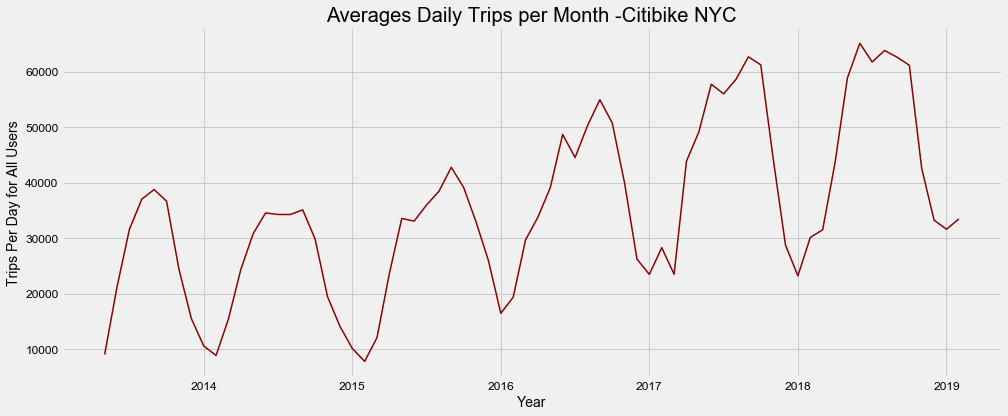

<Figure size 432x288 with 0 Axes>

In [21]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


trips_idx_mean.plot(figsize=(15, 6), color= "darkred", lw= 1.5)
plt.style.use('seaborn-darkgrid')
plt.title('Averages Daily Trips per Month -Citibike NYC')
plt.xlabel('Year')
plt.ylabel('Trips Per Day for All Users')
plt.show()
plt.savefig('Averages_Daily_Trips_per_Month.png')

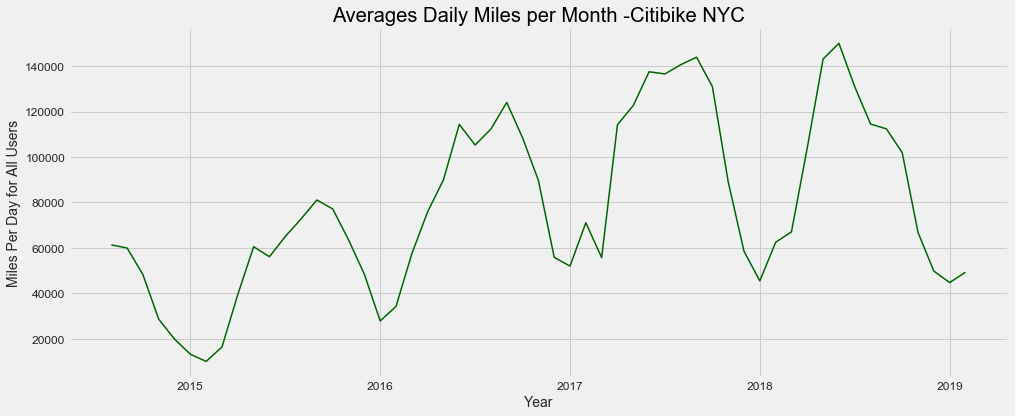

In [23]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


miles_idx_mean.plot(figsize=(15, 6), color= "darkgreen", lw= 1.5)
plt.style.use('seaborn-darkgrid')
plt.title('Averages Daily Miles per Month -Citibike NYC')
plt.xlabel('Year')
plt.ylabel('Miles Per Day for All Users')
plt.savefig('Averages_Daily_Miles_per_Month2.png')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 12
decomposition = sm.tsa.seasonal_decompose(trips_idx_mean, model='additive')
fig, axes = plt.subplots(4, 1, sharex=True)


decomposition.observed.plot(title ='Decomposition Plots for Averages Daily Trips per Month -Citibike NYC',ax=axes[0], legend=False, color='darkred',lw='1.5')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False, color ='darkred',lw='1.5')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False, color='darkred',lw='1.5')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False, color='darkorange',lw='3')
axes[3].set_ylabel('Residual')

plt.savefig('Decomposition_Averages_Daily_Trips_per_Month.png')

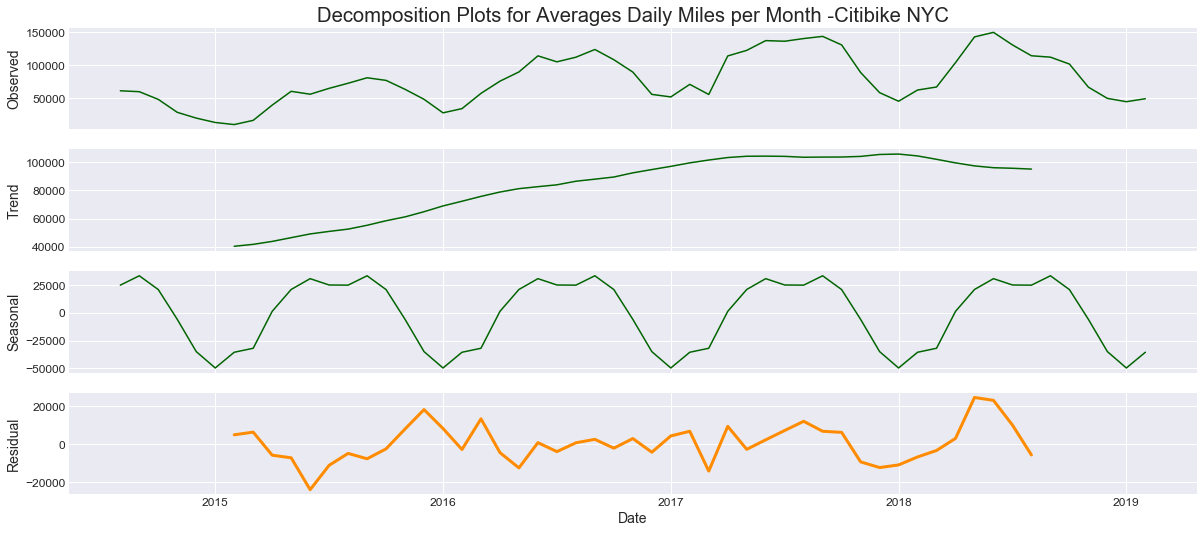

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(miles_idx_mean, model='additive')
fig, axes = plt.subplots(4, 1, sharex=True)


decomposition.observed.plot(title ='Decomposition Plots for Averages Daily Miles per Month -Citibike NYC',ax=axes[0], legend=False, color='darkgreen',lw='1.5')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False, color ='darkgreen',lw='1.5')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False, color='darkgreen',lw='1.5')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False, color='darkorange',lw='3')
axes[3].set_ylabel('Residual')

plt.savefig('Decomposition_Averages_Daily_Miles_per_Month.png')



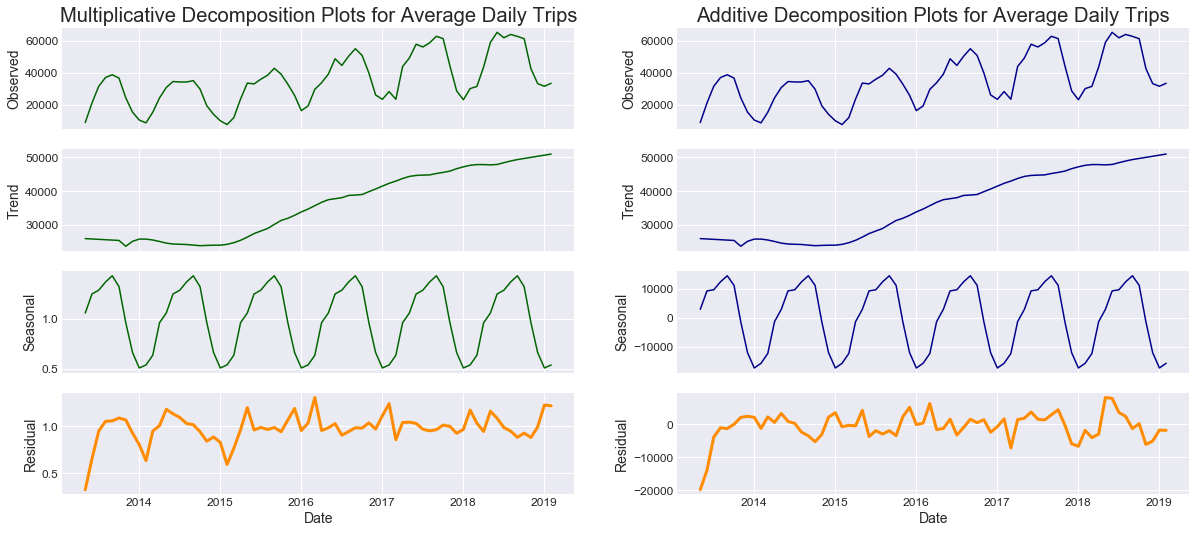

In [25]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8
#decomposition = sm.tsa.seasonal_decompose(trips_idx_mean, model='additive')
result_mul = seasonal_decompose(trips_idx_mean, model='multiplicative', extrapolate_trend='freq')
result_add = seasonal_decompose(trips_idx_mean, model='additive', extrapolate_trend='freq')


fig, axarr = plt.subplots(4, 2, sharex=True)



result_mul.observed.plot(title ='Multiplicative Decomposition Plots for Average Daily Trips',ax=axarr[0,0], legend=False, color='darkgreen',lw='1.5')
axarr[0,0].set_ylabel('Observed')
result_mul.trend.plot(ax=axarr[1,0], legend=False, color ='darkgreen',lw='1.5')
axarr[1,0].set_ylabel('Trend')
result_mul.seasonal.plot(ax=axarr[2,0], legend=False, color='darkgreen',lw='1.5')
axarr[2,0].set_ylabel('Seasonal')
result_mul.resid.plot(ax=axarr[3,0], legend=False, color='darkorange',lw='3')
axarr[3,0].set_ylabel('Residual')

result_add.observed.plot(title ='Additive Decomposition Plots for Average Daily Trips',ax=axarr[0,1], legend=False, color='darkblue',lw='1.5')
axarr[0,1].set_ylabel('Observed')
result_add.trend.plot(ax=axarr[1,1], legend=False, color ='darkblue',lw='1.5')
axarr[1,1].set_ylabel('Trend')
result_add.seasonal.plot(ax=axarr[2,1], legend=False, color='darkblue',lw='1.5')
axarr[2,1].set_ylabel('Seasonal')
result_add.resid.plot(ax=axarr[3,1], legend=False, color='darkorange',lw='3.0')
axarr[3,1].set_ylabel('Residual')

plt.savefig('A_M_Decomposition_Averages_Daily_Trips_per_Month.png')


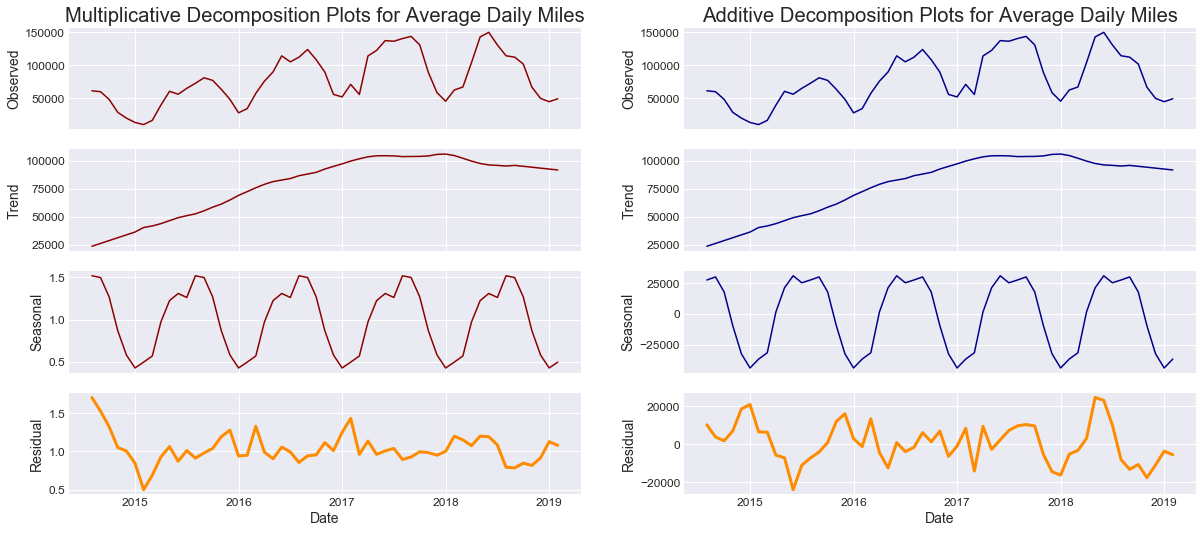

In [26]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8
#decomposition = sm.tsa.seasonal_decompose(trips_idx_mean, model='additive')
miles_result_mul = seasonal_decompose(miles_idx_mean, model='multiplicative', extrapolate_trend='freq')
miles_result_add = seasonal_decompose(miles_idx_mean, model='additive', extrapolate_trend='freq')


fig, axarr = plt.subplots(4, 2, sharex=True)



miles_result_mul.observed.plot(title ='Multiplicative Decomposition Plots for Average Daily Miles',ax=axarr[0,0], legend=False, color='darkred',lw='1.5')
axarr[0,0].set_ylabel('Observed')
miles_result_mul.trend.plot(ax=axarr[1,0], legend=False, color ='darkred',lw='1.5')
axarr[1,0].set_ylabel('Trend')
miles_result_mul.seasonal.plot(ax=axarr[2,0], legend=False, color='darkred',lw='1.5')
axarr[2,0].set_ylabel('Seasonal')
miles_result_mul.resid.plot(ax=axarr[3,0], legend=False, color='darkorange',lw='3')
axarr[3,0].set_ylabel('Residual')

miles_result_add.observed.plot(title ='Additive Decomposition Plots for Average Daily Miles',ax=axarr[0,1], legend=False, color='darkblue',lw='1.5')
axarr[0,1].set_ylabel('Observed')
miles_result_add.trend.plot(ax=axarr[1,1], legend=False, color ='darkblue',lw='1.5')
axarr[1,1].set_ylabel('Trend')
miles_result_add.seasonal.plot(ax=axarr[2,1], legend=False, color='darkblue',lw='1.5')
axarr[2,1].set_ylabel('Seasonal')
miles_result_add.resid.plot(ax=axarr[3,1], legend=False, color='darkorange',lw='3.0')
axarr[3,1].set_ylabel('Residual')

plt.savefig('A_M_Decomposition_Averages_Daily_Miles_per_Month.png')